In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt
import math
import time 
import random 

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
def label_reshape(arr_labele):
    label_vector=[]
    for i in range(len(arr_labele)):
        label_vector.append([0 for _ in range(10)])
        x = arr_labele[i]
        label_vector[i][x] = 1
    return label_vector  

In [5]:
train_labels = label_reshape(train_labels)
test_labels = label_reshape(test_labels)

In [6]:
print(
    "Training Data Shape is {} ,  Its Type Is {} ,\nTest Data Shape is {} , Its Type is {} ".format(
        train_images.shape , type(train_images) , test_images.shape , type(test_images)
    )
)

Training Data Shape is (60000, 28, 28) ,  Its Type Is <class 'numpy.ndarray'> ,
Test Data Shape is (10000, 28, 28) , Its Type is <class 'numpy.ndarray'> 


In [7]:
def display_img(mnist_index):
   
    image = mnist_index
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

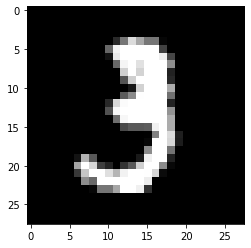

In [8]:
display_img(train_images[10])

In [9]:
train_labels[10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

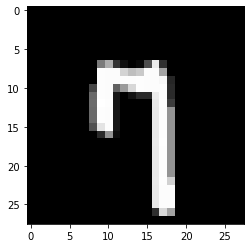

In [10]:
display_img(test_images[80])

In [11]:
test_labels[80]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [12]:
def imaged_grid(img , row , col ):
 
    x , y = img.shape

    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)
    
    return (img.reshape ( x //row, row, -1, col)
               .swapaxes(1,2)
               .reshape(-1, row, col))
    

In [13]:
print(imaged_grid(test_images[20] , 7 , 14 ).shape)
imaged_grid(test_images[20] , 7 , 14 )

(8, 7, 14)


array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0, 

In [14]:
def get_centroid(img):

    feature_vector = []
 
    for grid in imaged_grid(img , 7 , 7 ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
    
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
            feature_vector.append( (Xc/ sum)/6 )
            feature_vector.append((Yc/ sum )/6)
        else :
             feature_vector.append(0)
             feature_vector.append(0)
        
    
    return np.array(feature_vector)

In [15]:
get_centroid(test_images[20])

array([0.        , 0.        , 0.        , 0.        , 1.        ,
       0.43545752, 0.        , 0.        , 0.        , 0.        ,
       0.69624439, 0.67855843, 0.48555192, 0.48490978, 0.26151013,
       0.00184162, 0.        , 0.        , 0.35787962, 0.69891631,
       0.41040735, 0.24892081, 0.        , 0.        , 0.        ,
       0.        , 0.33032507, 0.72876257, 0.10180995, 0.        ,
       0.        , 0.        ])

In [16]:
get_centroid(train_images[20])

array([0.9853211 , 0.65993884, 0.        , 0.        , 0.87639198,
       0.70019797, 0.        , 0.        , 0.40889044, 0.83136026,
       0.7631751 , 0.18229371, 0.58078624, 0.60054172, 0.        ,
       0.        , 0.17948718, 1.        , 0.2643743 , 0.44750564,
       0.43548387, 0.59357127, 0.95273632, 0.00331675, 0.        ,
       0.        , 0.        , 0.        , 0.11608061, 0.8660292 ,
       0.13865741, 0.01967593])

In [17]:
print("Feature Extraction From Training Data")
train_features = [get_centroid(img)  for img in train_images  ]
print("Done")

Feature Extraction From Training Data
Done


In [18]:
train_features = np.array(train_features)

In [19]:
train_features.shape

(60000, 32)

In [20]:
train_features[:2]

array([[0.        , 0.        , 0.99538259, 0.76759015, 0.95237072,
        0.52284773, 0.90722714, 0.12153392, 0.        , 0.        ,
        0.3202967 , 0.68394583, 0.26389366, 0.29288415, 0.        ,
        0.06842105, 0.        , 0.        , 0.87253788, 0.89393939,
        0.5414509 , 0.4341916 , 0.        , 0.        , 0.42677448,
        0.87915544, 0.2303024 , 0.47464974, 0.02380952, 0.10032103,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 1.        , 0.87379715,
        0.46733064, 1.        , 0.        , 0.        , 0.        ,
        0.54656911, 0.63886179, 0.27626318, 0.56664243, 0.64426654,
        0.04892447, 0.59130146, 1.        , 0.52702483, 0.17403337,
        0.64201542, 0.61992028, 0.15041741, 0.05307096, 0.04129794,
        1.        , 0.14377555, 0.50471944, 0.03342554, 0.10511757,
        0.        , 0.        ]])

In [21]:
print("Feature Extraction From Test Data")
test_features = [get_centroid(img)  for img in test_images  ]
print("Done")

Feature Extraction From Test Data
Done


In [22]:
test_features = np.array(test_features)

In [23]:
test_features.shape

(10000, 32)

In [24]:
test_features[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.1590706 , 1.        ,
       0.20332384, 0.48670465, 0.47831954, 0.61189345, 0.38080169,
       0.        , 0.        , 0.        , 0.98592593, 0.99777778,
       0.49502917, 0.34278202, 0.        , 0.        , 0.        ,
       0.        , 0.47806899, 0.82130956, 0.15115623, 0.02199662,
       0.        , 0.        ])

In [25]:
class Layer:
    def __init__(self, input_size, output_size , activation_function):
        self.input = None
        self.output = []
        self.weights = []
        self.activation_function = activation_function
        ##nested loop to initailze the weigths with random values
        for i in range(input_size):
          col = []
          for j in range(output_size):
              col.append(random.random())
          self.weights.append(col)
        

    def forward_propagation(self, given_input  ):
        self.input = given_input
        self.output = []
        for col in range(len(self.weights[0])):
            sum = 0 
            for i in range(len(self.input) ):
                sum += self.input[i] * self.weights[i][col]
                
            if self.activation_function == "sigmoid" :
                self.output.append( 1/ (  1+(math.exp(-sum)) ))
            
            elif self.activation_function == "tanh" :
                self.output.append( math.tanh(sum))

        
        return self.output
        
        
    def back_propagation(self, previous_errors, learning_rate , targets):
        
        upcoming_error = []
        for i in range( len(self.input)):
            upcoming_error.append(0)

        
       #change the weights at the output layer
        if len(previous_errors) == 0 :
            for cur_neuron in range ( len(self.output) ) :
                delta_j = ( targets[cur_neuron] - self.output[cur_neuron] ) * self.output[cur_neuron]  * (1-self.output[cur_neuron])

                for upcoming_nueron in range( len( self.input) ) :
                    upcoming_error[upcoming_nueron] += delta_j * self.weights[upcoming_nueron][cur_neuron] 
                    self.weights[upcoming_nueron][cur_neuron] += ( delta_j * self.input[upcoming_nueron] * learning_rate)

      
        #change the weights at the hidden layer
        else :
                
            for cur_neuron in range ( len(self.output) ) :
                delta_j = previous_errors[cur_neuron] * self.output[cur_neuron]  * (1-self.output[cur_neuron]) 

                for upcoming_nueron in range( len ( self.input) ) :
                    
                    upcoming_error[upcoming_nueron] += delta_j * self.weights[upcoming_nueron][cur_neuron] 
                    self.weights[upcoming_nueron][cur_neuron] += delta_j * learning_rate * self.input[upcoming_nueron]
                    
                    
        return upcoming_error




In [26]:
class Network:
    def __init__(self):
        self.layers = []

    def add(self, layer ):
        self.layers.append(layer )


    def predict(self, input_data):
        
        predicted = []
        for i in range( len(input_data) ):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output )
            predicted.append(output)

        return predicted


    def fit(self, train_data, train_labels, epochs, learning_rate):
        
        samples = len(train_data)

        # training loop
        for epoch in range(epochs):
            
            for sample in range(samples):
        
                cur_deltas = []
                
                output = train_data[sample]
                
                for layer in self.layers:
                    output = layer.forward_propagation(output )


                for layer in reversed(self.layers):
                    cur_deltas = layer.back_propagation(cur_deltas, learning_rate , train_labels[sample])
                
                




In [27]:

NN = Network()
NN.add(Layer(32, 16 , "sigmoid"))
NN.add(Layer(16, 10 , "sigmoid"))
NN.fit(train_features, train_labels, epochs=100, learning_rate= 0.05)

In [28]:
p = NN.predict(test_features)
p

[[1.1095840481021128e-05,
  3.3928434823111066e-08,
  0.005603718425942239,
  0.00011080808005816043,
  2.0171500640773142e-08,
  0.0002830698835439265,
  1.2556981398061995e-05,
  0.9979566585801761,
  0.0007471118208198096,
  0.010292261711336083],
 [0.0011708876704310434,
  1.0326606633585585e-05,
  0.7765660300540328,
  0.0792051698960358,
  1.126781312059257e-05,
  7.809928471653157e-06,
  0.08966622928778747,
  2.4058539249848018e-05,
  2.416434162025545e-06,
  1.935449182702978e-07],
 [2.8826494629227915e-10,
  0.9962918506298836,
  7.732611698332145e-05,
  0.0034866001842689,
  0.013655739732026311,
  0.0005567445369608589,
  0.00783043754027604,
  0.00139483652617212,
  0.005430624424931184,
  0.010909921564517087],
 [0.9931785995756163,
  8.219074984540823e-09,
  0.010557719798147958,
  0.024973365812621606,
  8.6477772083404e-06,
  0.00032986149782691823,
  0.00485490837517249,
  4.758317668584622e-05,
  0.0009805699733311858,
  9.75629735584251e-07],
 [1.3352815479931223e-0

In [29]:
def acc(predict,labels):
  X = []
  Y = []
  for i in predict:
    max_value = max(i)
    max_index = i.index(max_value)
    X.append(max_index)
  for j in labels:
    max_value = max(j)
    max_index = j.index(max_value)
    Y.append(max_index)
  rLabels = 0
  labels = len(X)
  for i in range(len(X)):
    if X[i]==Y[i]:
      rLabels=rLabels+1
  return(rLabels/labels)*100


In [30]:
print("Accuracy Score = {} %".format(acc(p,test_labels)))

Accuracy Score = 86.41 %
